<a href="https://colab.research.google.com/github/leemhoon00/prac_keras/blob/main/%ED%9A%8C%EA%B7%80%EB%AC%B8%EC%A0%9C_%EC%A3%BC%ED%83%9D%EA%B0%80%EA%B2%A9%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

코드 3-24 보스턴 주택 데이터셋 로드하기

In [2]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

65536/57026 [==================================] - 0s 0us/step


코드 3-25 데이터 정규화하기

In [3]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

코드 3-26 모델 정의하기

In [4]:
from keras import models
from keras import layers

def build_model():
  model = models.Sequential()
  model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mean_absolute_error'])
  return model

코드 3-27 K-겹 검증하기

In [5]:
import numpy as np

k=4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores=[]

for i in range(k):
  print('처리중인 폴드 #',i)
  val_data = train_data[i * num_val_samples:(i+1)*num_val_samples]
  val_targets = train_targets[i*num_val_samples:(i+1) * num_val_samples]

  partial_train_data = np.concatenate([train_data[:i*num_val_samples],train_data[(i+1)*num_val_samples:]],axis=0)
  partial_train_targets = np.concatenate([train_targets[:i*num_val_samples],train_targets[(i+1)*num_val_samples:]],axis=0)

  model = build_model() #케라스 모델 구성
  model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0) #모델 훈련(verbose=0이므로 훈련과정 출력x)
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0) #검증세트로 모델 평가
  all_scores.append(val_mae)

처리중인 폴드 # 0
처리중인 폴드 # 1
처리중인 폴드 # 2
처리중인 폴드 # 3


코드 3-28 각 폴드에서 검증 점수를 로그에 저장하기

In [6]:
num_epochs = 500
all_mae_histories=[]
for i in range(k):
  print('처리중인 폴드 #',i)
  val_data = train_data[i * num_val_samples:(i+1)*num_val_samples]
  val_targets = train_targets[i*num_val_samples:(i+1) * num_val_samples]
  partial_train_data = np.concatenate([train_data[:i*num_val_samples],train_data[(i+1)*num_val_samples:]],axis=0)
  partial_train_targets = np.concatenate([train_targets[:i*num_val_samples],train_targets[(i+1)*num_val_samples:]],axis=0)

  model = build_model() #케라스 모델 구성
  history = model.fit(partial_train_data, partial_train_targets, validation_data=(val_data, val_targets),epochs=num_epochs, batch_size=1, verbose=0)
  mae_history = history.history['val_mean_absolute_error']
  all_mae_histories.append(mae_history)

처리중인 폴드 # 0
처리중인 폴드 # 1
처리중인 폴드 # 2
처리중인 폴드 # 3


코드 3-29 K-겹 검증 점수 평균을 기록하기

In [7]:
average_mae_history =[np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

코드 3-30 검증 점수 그래프

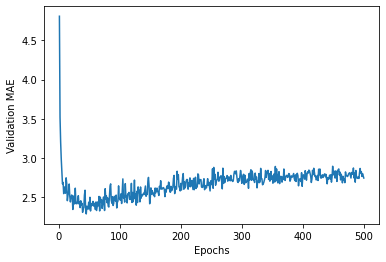

In [8]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history)+1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

코드 3-31 처음 10개의 데이터 포인트를 제외한 검증 점수 그리기

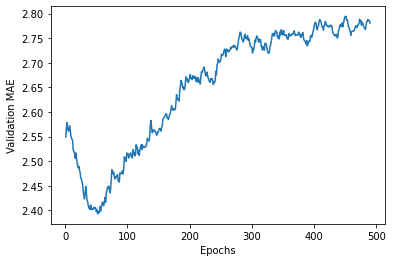

In [9]:
def smooth_curve(points, factor=0.9):
  smoothed_points=[]
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous*factor+point*(1-factor))
    else:
      smoothed_points.append(point)

  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history)+1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

코드 3-32 최종 모델 훈련하기

In [10]:
model = build_model()
model.fit(train_data, train_targets, epochs=80, batch_size=16, verbose=0) #전체 데이터로 훈련
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 5ms/step - loss: 19.1837 - mean_absolute_error: 2.7566


최종결과

In [11]:
print(test_mae_score)

2.756641149520874
